In [38]:
import pandas as pd
from statsbombpy import sb
from mplsoccer import Sbopen
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
# Spain vs Poland
MATCH_ID = 3788762
events = sb.events(match_id = MATCH_ID)

Get data

In [40]:
df = events[events.type == 'Shot']
df = df[['period', 'minute', 'shot_statsbomb_xg', 'team', 'player', 'shot_outcome', 'shot_type']]
df.rename(columns = {'shot_statsbomb_xg':'xG', 'shot_outcome':'result'}, inplace = True)
df.sort_values(by='team', inplace=True)
df

,period,minute,xG,team,player,result,shot_type
3600,1,5,0.025717,Poland,Mateusz Andrzej Klich,Off T,Open Play
3610,2,53,0.177551,Poland,Robert Lewandowski,Goal,Open Play
3607,1,41,0.055475,Poland,Karol Świderski,Post,Open Play
3606,1,34,0.196803,Poland,Karol Świderski,Off T,Open Play
3608,1,42,0.096711,Poland,Robert Lewandowski,Saved,Open Play
3605,1,33,0.081536,Spain,Gerard Moreno Balaguero,Off T,Free Kick
3603,1,24,0.029604,Spain,Gerard Moreno Balaguero,Blocked,Open Play
3602,1,12,0.015647,Spain,Pau Francisco Torres,Off T,Open Play
3615,2,83,0.481273,Spain,Álvaro Borja Morata Martín,Saved,Open Play
3609,1,44,0.140010,Spain,Gerard Moreno Balaguero,Off T,Open Play


Get team names

In [41]:
home_team = df['team'].iloc[0]
away_team = df['team'].iloc[-1]
print('Home Team : ' + home_team)
print('Away Team : ' + away_team)

Home Team : Poland
Away Team : Spain


Add element for better chart

In [42]:
new_row_home = {'period':1, 
           'minute':0, 
           'xG':0.000001, 
           'team':home_team,
           'player':'', 
           'result':'',
           'shot_type':'Open Play'
           }

new_row_away = {'period':1, 
           'minute':0, 
           'xG':0.000001, 
           'team':away_team,
           'player':'', 
           'result':'',
           'shot_type':'Open Play'
           }

df = df.append(new_row_home, ignore_index=True)
df = df.append(new_row_away, ignore_index=True)

/var/folders/_h/ljwht4gd7lb99rm1hm78h7_00000gn/T/ipykernel_39587/2472934798.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row_home, ignore_index=True)
/var/folders/_h/ljwht4gd7lb99rm1hm78h7_00000gn/T/ipykernel_39587/2472934798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row_away, ignore_index=True)


Cumulative Sum xG

In [43]:
home_df = df[df['team'] == home_team]
home_df.sort_values(by='minute', inplace=True)
home_df['h_cum'] = home_df['xG'].cumsum()

away_df = df[df['team'] == away_team]
away_df.sort_values(by='minute', inplace=True)
away_df['a_cum'] = away_df['xG'].cumsum()

/var/folders/_h/ljwht4gd7lb99rm1hm78h7_00000gn/T/ipykernel_39587/3182853901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df.sort_values(by='minute', inplace=True)
/var/folders/_h/ljwht4gd7lb99rm1hm78h7_00000gn/T/ipykernel_39587/3182853901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['h_cum'] = home_df['xG'].cumsum()
/var/folders/_h/ljwht4gd7lb99rm1hm78h7_00000gn/T/ipykernel_39587/3182853901.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

In [44]:
home_goal = home_df[home_df['result'].str.contains("Goal")]
home_goal["scorechart"] = home_goal["minute"].astype(str) + "'" + " " +home_goal["player"] + " (" + home_goal["shot_type"] + ")"

away_goal = away_df[away_df['result'].str.contains("Goal")]
away_goal["scorechart"] = away_goal["minute"].astype(str) + "'" + " " +away_goal["player"] + " (" + away_goal["shot_type"] + ")"

/var/folders/_h/ljwht4gd7lb99rm1hm78h7_00000gn/T/ipykernel_39587/2558652882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_goal["scorechart"] = home_goal["minute"].astype(str) + "'" + " " +home_goal["player"] + " (" + home_goal["shot_type"] + ")"
/var/folders/_h/ljwht4gd7lb99rm1hm78h7_00000gn/T/ipykernel_39587/2558652882.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_goal["scorechart"] = away_goal["minute"].astype(str) + "'" + " " +away_goal["player"] + " (" + away_goal["shot_type"] + ")

Total xG 

In [45]:
home_total_xG = round(home_df['xG'].sum(),2).astype(str)
away_total_xG = round(away_df['xG'].sum(),2).astype(str)

Number od goals

In [46]:
h_total_goals = str(len(home_goal))
a_total_goals = str(len(away_goal))

Create chart

/var/folders/_h/ljwht4gd7lb99rm1hm78h7_00000gn/T/ipykernel_39587/2037733642.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for j, txt in home_goal['scorechart'].iteritems():
/var/folders/_h/ljwht4gd7lb99rm1hm78h7_00000gn/T/ipykernel_39587/2037733642.py:23: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, txt in away_goal['scorechart'].iteritems():


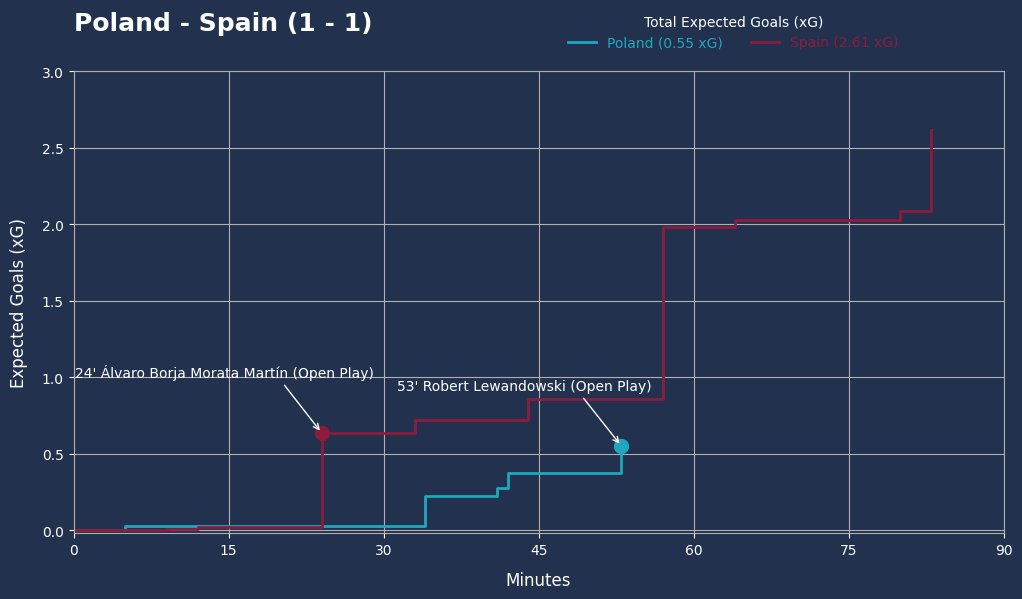

In [49]:
fig, ax = plt.subplots(figsize=(12,6))

# Create line plots
ax.step(x = home_df['minute'], y = home_df['h_cum'], where = 'post', color ='#1EA8BD', label= home_team + " (" + home_total_xG + " xG)"  ,linewidth=2)  
ax.step(x = away_df['minute'], y = away_df['a_cum'], where = 'post', color = '#8D1B3D', label= away_team + " (" + away_total_xG + " xG)" ,linewidth=2)

# Create scatter plot for highlighting the goal
ax.scatter(x= home_goal['minute'], y = home_goal['h_cum'] , marker= 'o', s= 100 ,color = '#1EA8BD')
ax.scatter(x= away_goal['minute'], y = away_goal['a_cum'] , marker= 'o', s =100, color = '#8D1B3D')


# Customize our chart
for j, txt in home_goal['scorechart'].iteritems():
    ax.annotate(txt, 
                (home_goal['minute'][j], home_goal['h_cum'][j]),
                xycoords='data',
                ha='center',
                xytext=(-70, 40), 
                textcoords='offset points', 
                color='white',
                arrowprops=dict(arrowstyle="->",connectionstyle="arc,angleA=0,armA=50,rad=10", color = 'white'))

for i, txt in away_goal['scorechart'].iteritems():
    ax.annotate(
                txt, 
                (away_goal['minute'][i], away_goal['a_cum'][i]),
                xycoords='data', 
                ha='center',
                xytext=(-70, 40), 
                textcoords='offset points', 
                color='white',
                arrowprops=dict(arrowstyle="->",connectionstyle="arc,angleA=0,armA=50,rad=10", color = 'white')
                )




# Axis
plt.xticks([0,15,30,45,60,75,90])
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3])
plt.xlim(0)
plt.ylim(-0.02)
plt.grid()
# color for axis
ax.spines['top'].set_color('#B0B0B0')
ax.spines['bottom'].set_color('#B0B0B0')
ax.spines['right'].set_color('#B0B0B0')
ax.spines['left'].set_color('#B0B0B0')

ax.tick_params(axis='x', colors='white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')

# title
ax.set_title(home_team + " - " + away_team + " (" + h_total_goals + " - " + a_total_goals + ")",fontsize=18,fontweight="bold", color = "white", pad=30, loc="left")

# legend
legend = ax.legend(title = 'Total Expected Goals (xG)' ,loc='best', shadow=True, frameon=False, ncol=2,  labelcolor='linecolor', bbox_to_anchor=(0.9, 1.15))
title = legend.get_title()
title.set_color("white")

# background colors
ax.set_facecolor("#22314E")
fig.patch.set_facecolor('#22314E')


plt.ylabel("Expected Goals (xG)", fontsize = 12, labelpad = 10)
plt.xlabel("Minutes", fontsize = 12, labelpad = 10)


plt.savefig('Images/xGChart_Euro.png')

Code from: [Python for Sports Data Science: How to Create an Expected Goals Chart](https://medium.com/@yogakrisanto1129/python-for-sports-data-science-how-to-create-an-expected-goals-chart-3157168a453a)

Inne kolory

/var/folders/_h/ljwht4gd7lb99rm1hm78h7_00000gn/T/ipykernel_39587/1278848709.py:15: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for j, txt in home_goal['scorechart'].iteritems():
/var/folders/_h/ljwht4gd7lb99rm1hm78h7_00000gn/T/ipykernel_39587/1278848709.py:25: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, txt in away_goal['scorechart'].iteritems():


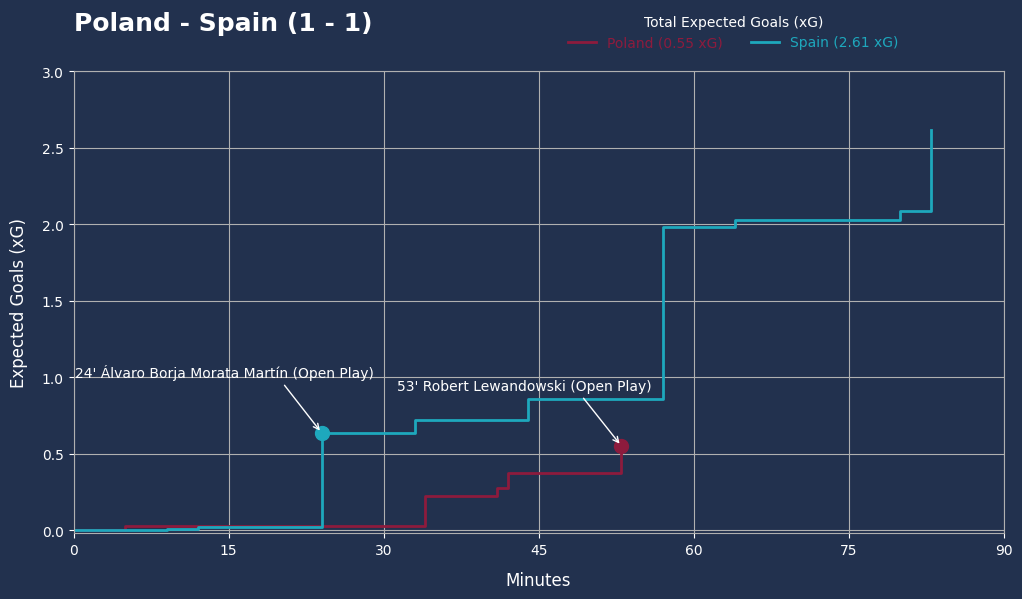

In [51]:
fig, ax = plt.subplots(figsize=(12,6))

# Create line plots
ax.step(x = home_df['minute'], y = home_df['h_cum'], where = 'post', color ='#8D1B3D', label= home_team + " (" + home_total_xG + " xG)"  ,linewidth=2)  
ax.step(x = away_df['minute'], y = away_df['a_cum'], where = 'post', color = '#1EA8BD', label= away_team + " (" + away_total_xG + " xG)" ,linewidth=2)

# Create scatter plot for highlighting the goal
ax.scatter(x= home_goal['minute'], y = home_goal['h_cum'] , marker= 'o', s= 100 ,color = '#8D1B3D')
ax.scatter(x= away_goal['minute'], y = away_goal['a_cum'] , marker= 'o', s =100, color = '#1EA8BD')

#1EA8BD
#8D1B3D

# Customize our chart
for j, txt in home_goal['scorechart'].iteritems():
    ax.annotate(txt, 
                (home_goal['minute'][j], home_goal['h_cum'][j]),
                xycoords='data',
                ha='center',
                xytext=(-70, 40), 
                textcoords='offset points', 
                color='white',
                arrowprops=dict(arrowstyle="->",connectionstyle="arc,angleA=0,armA=50,rad=10", color = 'white'))

for i, txt in away_goal['scorechart'].iteritems():
    ax.annotate(
                txt, 
                (away_goal['minute'][i], away_goal['a_cum'][i]),
                xycoords='data', 
                ha='center',
                xytext=(-70, 40), 
                textcoords='offset points', 
                color='white',
                arrowprops=dict(arrowstyle="->",connectionstyle="arc,angleA=0,armA=50,rad=10", color = 'white')
                )




# Axis
plt.xticks([0,15,30,45,60,75,90])
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3])
plt.xlim(0)
plt.ylim(-0.02)
plt.grid()
# color for axis
ax.spines['top'].set_color('#B0B0B0')
ax.spines['bottom'].set_color('#B0B0B0')
ax.spines['right'].set_color('#B0B0B0')
ax.spines['left'].set_color('#B0B0B0')

ax.tick_params(axis='x', colors='white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')

# title
ax.set_title(home_team + " - " + away_team + " (" + h_total_goals + " - " + a_total_goals + ")",fontsize=18,fontweight="bold", color = "white", pad=30, loc="left")

# legend
legend = ax.legend(title = 'Total Expected Goals (xG)' ,loc='best', shadow=True, frameon=False, ncol=2,  labelcolor='linecolor', bbox_to_anchor=(0.9, 1.15))
title = legend.get_title()
title.set_color("white")

# background colors
ax.set_facecolor("#22314E")
fig.patch.set_facecolor('#22314E')


plt.ylabel("Expected Goals (xG)", fontsize = 12, labelpad = 10)
plt.xlabel("Minutes", fontsize = 12, labelpad = 10)


plt.savefig('Images/xGChart_Euro.png')